# SciPy-数值计算库

In [21]:
%matplotlib_svg
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

## 常数和特殊函数

constants模块提供了众多的物理常数

In [1]:
from scipy import constants as C
print C.c # 真空中的光速
print C.h # 普朗克常数

299792458.0
6.62606957e-34


C.physical_constants字典, 以物理量名为键, 包含常数值,单位,误差的三元组为字典值

In [3]:
C.physical_constants["electron mass"]

(9.10938291e-31, 'kg', 4e-38)

单位信息, 向标准单位转换时所需 除以 的系数

In [5]:
# 1英里等于多少米, 1英寸等于多少米, 1克等于多少千克, 1磅等于多少千克
%C C.mile; C.inch; C.gram; C.pound

      C.mile        C.inch  C.gram        C.pound      
------------------  ------  ------  -------------------
1609.3439999999998  0.0254  0.001   0.45359236999999997


special模块是一个非常完整的函数库函数

In [10]:
import scipy.special as S
print S.gamma(4)
print S.gamma(0.5)
print S.gamma(1+1j) # gamma函数支持复数

6.0
1.77245385091
(0.498015668118-0.154949828302j)


In [9]:
S.gammaln(1000)
# 直接计算gamma的对数值
print S.gamma(1000)

inf


In [14]:
print 1 + 1e-20
print np.log(1+1e-20)
print S.log1p(1e-20) # 计算log(1+x)的值

1.0
0.0
1e-20


雅各比椭圆函数, special模块提供的函数都是ufunc函数

In [16]:
m = np.linspace(0.1, 0.9, 4)
u = np.linspace(-10, 10, 200)
results = S.ellipj(u[:, None], m[None, :])

print [y.shape for y in results]
np.array(results).shape

 [(200, 4), (200, 4), (200, 4), (200, 4)]


(4, 200, 4)

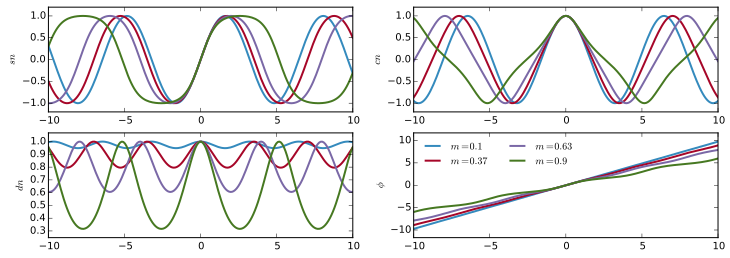

In [24]:
# 使用广播计算得到的`ellipj()`返回值
plt.close("all")
fig, axes = pl.subplots(2, 2, figsize=(12, 4))
labels = ["$sn$", "$cn$", "$dn$", "$\phi$"]
for ax, y, label in zip(axes.ravel(), results, labels):
    ax.plot(u, y)
    ax.set_ylabel(label)
    ax.margins(0, 0.1)
    
axes[1, 1].legend(["$m={:.2g}$".format(m_) for m_ in m],\
                  loc="best", ncol=2, \
                  frameon=False);